## 기존 KNN Regression 알고리즘을 통해 농어의 무게 예측▼

길이가 50cm인 농어의 무게 예측 :  [1033.33333333]


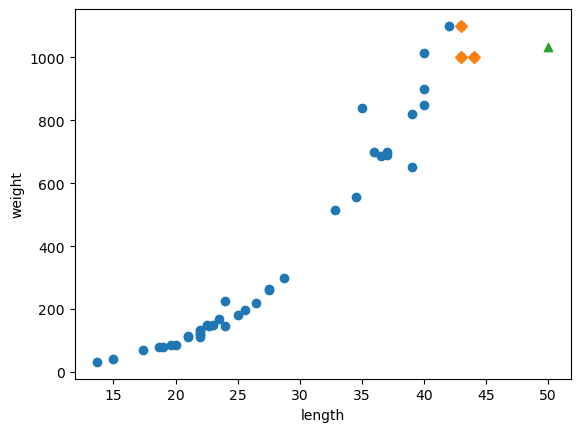

이웃 샘플의 타깃의 평균 :  1033.3333333333333


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련 세트와 테스트 세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 최근접 이웃 개수를 3으로 하는 모델을 훈련한다. 여기까지는 1절에서 했던 내용 그대로이다.
knr = KNeighborsRegressor(n_neighbors = 3)

# KNN Regression 모델을 훈련한다.
knr.fit(train_input, train_target)

# 이제 앞선 모델을 사용해 길이가 50cm인 농어의 무게를 예측
print("길이가 50cm인 농어의 무게 예측 : ",knr.predict([[50]]))

# 50cm 농어의 이웃을 구한다.
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 이웃 샘플의 타깃의 평균
print("이웃 샘플의 타깃의 평균 : ", np.mean(train_target[indexes]))

길이가 100cm인 농어의 무게 예측 :  [1033.33333333]


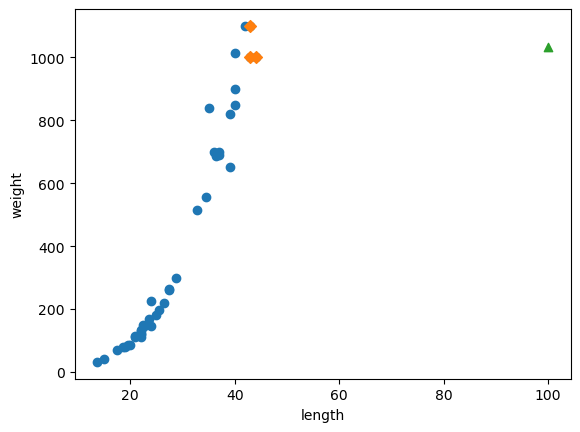

In [10]:
# 이번에는 길이가 100cm인 농어의 무게 예측(정말로 모델에 오류가 있는지 테스트)
print("길이가 100cm인 농어의 무게 예측 : ", knr.predict([[100]]))

# 100cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## Linear Regression 선형 회귀 알고리즘을 통해 농어의 무게 예측▼

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련한다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측한다.
print("50cm 농어에 대해 예측 : ", lr.predict([[50]]))

'''
LinearRegression 클래스가 직선의 방정식 y = ax + b에서 해당 데이터에 잘 맞는 a와 b
를 찾았는지 확인

LinearRegerssion 클래스가 찾은 a와b는 lr 객체의 coef_와 intercept_ 속성에 잘 저장
'''
print(lr.coef_, lr.intercept_)

50cm 농어에 대해 예측 :  [1241.83860323]
[39.01714496] -709.0186449535477
